In [411]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

### 1. Load data and get an overview of the data

The data is collected with Tweepy StreamListener by Stream.Filter.

In [3]:
col_names = ['id_str','created_at','text','user_created_at','user_location',
            'user_followers_count','user_friends_count', 'longitude','latitude','retweet_count','favorite_count']

#Since the data is real-time stream, the values for retweet_count and 
#favorite_count are all zeros. We can ignore the two features going forward.

In [4]:
pinterest = pd.read_csv("PinterestData.txt", delimiter='\t', header=None, names = col_names)
instagram = pd.read_csv("InstagramData.txt", delimiter='\t', header=None, names = col_names)
snapchat = pd.read_csv("SnapchatData.txt", delimiter='\t', header=None, names = col_names)

/Users/elainewu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (5,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
"""
Add dummy variables so we can identify which subgroup a tweet is from.

"""

pinterest['pinterest'] = np.ones(len(pinterest))
instagram['instagram'] = np.ones(len(instagram))
snapchat['snapchat'] = np.ones(len(snapchat))

In [6]:
pinterest.head(2)

,id_str,created_at,text,user_created_at,user_location,user_followers_count,user_friends_count,longitude,latitude,retweet_count,favorite_count,pinterest
0,1171471960707981312,2019-09-10 17:14:14,Join us on Pinterest!,2013-07-19 22:50:29,TEXAS,1648.0,1037.0,None,None,0.0,0.0,1.0
1,1171471965036507136,2019-09-10 17:14:16,0:05 / 1:05 Pinterest Account Creator Female I...,2019-08-28 17:16:30,None,12.0,12.0,None,None,0.0,0.0,1.0


In [7]:
snapchat.head(2)

,id_str,created_at,text,user_created_at,user_location,user_followers_count,user_friends_count,longitude,latitude,retweet_count,favorite_count,snapchat
0,1171465916162293762,2019-09-10 16:50:13,RT _WWE: Dear person whos keeps repeatedly try...,2013-03-03 18:30:01,Angel Grove,304,184.0,None,None,0,0.0,1.0
1,1171465917198295041,2019-09-10 16:50:14,RT _: me trying to remember the last thing I s...,2012-10-07 00:23:13,Minneapolis || Madison,411,389.0,None,None,0,0.0,1.0


In [8]:
len(pinterest), len(instagram), len(snapchat)

(10018, 535743, 50604)

### 2. Join the three subsets and clean up data

In [9]:
three_com = pd.concat([pinterest, instagram, snapchat], ignore_index = True, sort = False)

In [10]:
three_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596365 entries, 0 to 596364
Data columns (total 14 columns):
id_str                  596247 non-null object
created_at              596346 non-null object
text                    596236 non-null object
user_created_at         596346 non-null object
user_location           596309 non-null object
user_followers_count    596154 non-null object
user_friends_count      596154 non-null object
longitude               595962 non-null object
latitude                595962 non-null object
retweet_count           595959 non-null object
favorite_count          595959 non-null object
pinterest               10018 non-null float64
instagram               535743 non-null float64
snapchat                50604 non-null float64
dtypes: float64(3), object(11)
memory usage: 63.7+ MB


In [11]:
"""
Fill in the NaN cells for each dummy variables

"""

three_com['pinterest'].fillna(0, inplace = True)
three_com['instagram'].fillna(0, inplace = True)
three_com['snapchat'].fillna(0, inplace = True)

In [12]:
three_com.head(3)

,id_str,created_at,text,user_created_at,user_location,user_followers_count,user_friends_count,longitude,latitude,retweet_count,favorite_count,pinterest,instagram,snapchat
0,1171471960707981312,2019-09-10 17:14:14,Join us on Pinterest!,2013-07-19 22:50:29,TEXAS,1648,1037,None,None,0,0,1.0,0.0,0.0
1,1171471965036507136,2019-09-10 17:14:16,0:05 / 1:05 Pinterest Account Creator Female I...,2019-08-28 17:16:30,None,12,12,None,None,0,0,1.0,0.0,0.0
2,1171472048910028800,2019-09-10 17:14:36,"RT _simplyi2: BUY 1, GET 1, 50% OFF! #9ctYello...",2009-08-24 06:46:14,"Texas, USA",18116,19407,None,None,0,0,1.0,0.0,0.0


In [13]:
missing_value = three_com.isnull().sum()
missing_value

id_str                  118
created_at               19
text                    129
user_created_at          19
user_location            56
user_followers_count    211
user_friends_count      211
longitude               403
latitude                403
retweet_count           406
favorite_count          406
pinterest                 0
instagram                 0
snapchat                  0
dtype: int64

* Since the number of missing value is small compared to the total dataset, below I will make a copy and delete the rows with missing values.

In [14]:
three_com.head(3)

,id_str,created_at,text,user_created_at,user_location,user_followers_count,user_friends_count,longitude,latitude,retweet_count,favorite_count,pinterest,instagram,snapchat
0,1171471960707981312,2019-09-10 17:14:14,Join us on Pinterest!,2013-07-19 22:50:29,TEXAS,1648,1037,None,None,0,0,1.0,0.0,0.0
1,1171471965036507136,2019-09-10 17:14:16,0:05 / 1:05 Pinterest Account Creator Female I...,2019-08-28 17:16:30,None,12,12,None,None,0,0,1.0,0.0,0.0
2,1171472048910028800,2019-09-10 17:14:36,"RT _simplyi2: BUY 1, GET 1, 50% OFF! #9ctYello...",2009-08-24 06:46:14,"Texas, USA",18116,19407,None,None,0,0,1.0,0.0,0.0


* Make a copy for code testing

In [15]:
three_com1 = three_com.copy()

In [16]:
# three_com1.dropna(subset = ['text'], inplace = True)
three_com1.dropna(inplace = True)

In [17]:
three_com1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595834 entries, 0 to 596364
Data columns (total 14 columns):
id_str                  595834 non-null object
created_at              595834 non-null object
text                    595834 non-null object
user_created_at         595834 non-null object
user_location           595834 non-null object
user_followers_count    595834 non-null object
user_friends_count      595834 non-null object
longitude               595834 non-null object
latitude                595834 non-null object
retweet_count           595834 non-null object
favorite_count          595834 non-null object
pinterest               595834 non-null float64
instagram               595834 non-null float64
snapchat                595834 non-null float64
dtypes: float64(3), object(11)
memory usage: 68.2+ MB


In [18]:
three_com1.isnull().sum()

id_str                  0
created_at              0
text                    0
user_created_at         0
user_location           0
user_followers_count    0
user_friends_count      0
longitude               0
latitude                0
retweet_count           0
favorite_count          0
pinterest               0
instagram               0
snapchat                0
dtype: int64

In [19]:
"""
After exploring the data, I found out there are entries with string value for feature 
"user_followers_count" and 'user_friends_count', which doesn't make sense. I deleted the entries considering the amount of such errors is small
"""
# clean up the data
three_com2  = three_com1[~three_com1['user_followers_count'].str.contains('[A-Z]|\|', na=False)]
three_com2  = three_com2[~three_com2['user_friends_count'].str.contains('[A-Z]|\|', na=False)]


#three_com1.drop([167404], axis = 0, inplace = True)
# three_com2['user_followers_count'] = three_com2['user_followers_count'].str.replace('||-//', '')
# three_com2['user_followers_count'] = three_com2three_com2['user_followers_count'].str.replace(' ||', '')


In [20]:
three_com2.info()
# Confirm that the data deleted is very small compared to the whole dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595832 entries, 0 to 596364
Data columns (total 14 columns):
id_str                  595832 non-null object
created_at              595832 non-null object
text                    595832 non-null object
user_created_at         595832 non-null object
user_location           595832 non-null object
user_followers_count    595832 non-null object
user_friends_count      595832 non-null object
longitude               595832 non-null object
latitude                595832 non-null object
retweet_count           595832 non-null object
favorite_count          595832 non-null object
pinterest               595832 non-null float64
instagram               595832 non-null float64
snapchat                595832 non-null float64
dtypes: float64(3), object(11)
memory usage: 68.2+ MB


In [21]:
three_com2['created_at'] = pd.to_datetime(three_com2['created_at'])

In [22]:
three_com2['user_followers_count'] = pd.to_numeric(three_com2['user_followers_count'])

In [23]:
three_com2['user_friends_count'] = pd.to_numeric(three_com2['user_friends_count'])

In [24]:
three_com2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595832 entries, 0 to 596364
Data columns (total 14 columns):
id_str                  595832 non-null object
created_at              595832 non-null datetime64[ns]
text                    595832 non-null object
user_created_at         595832 non-null object
user_location           595832 non-null object
user_followers_count    595832 non-null float64
user_friends_count      595832 non-null float64
longitude               595832 non-null object
latitude                595832 non-null object
retweet_count           595832 non-null object
favorite_count          595832 non-null object
pinterest               595832 non-null float64
instagram               595832 non-null float64
snapchat                595832 non-null float64
dtypes: datetime64[ns](1), float64(5), object(8)
memory usage: 68.2+ MB


#### 2. Timeframe of the tweets

In [217]:
"""
Explore the tweets posted over time. The data is filtered to get a subset after 
"2019-09-11 17:00:00", which is the time of interest

""" 

three_com2= three_com2[three_com2['created_at'] >'2019-09-11 17:00:00']

** Group the tweets for each hour

In [238]:
three_com2['Tweets Created At'] = three_com2['created_at'].apply(lambda x: str(x)[:13])
three_com2.head()

,id_str,created_at,text,user_created_at,user_location,user_followers_count,user_friends_count,longitude,latitude,retweet_count,favorite_count,pinterest,instagram,snapchat,hr,Tweets Created At
5221,1171830834866921473,2019-09-11 17:00:17,Check our our #Pinterest board for loads of gr...,2019-03-17 11:56:11,"Oxford, England",694.0,3594.0,None,None,0,0,1.0,0.0,0.0,2019-09-11 17,2019-09-11 17
5222,1171830840407527425,2019-09-11 17:00:18,i want a pinterest life,2019-08-14 20:42:31,Dubai,8.0,16.0,None,None,0,0,1.0,0.0,0.0,2019-09-11 17,2019-09-11 17
5223,1171830872091385858,2019-09-11 17:00:26,RT _: What's your super power?,2019-07-30 17:20:40,None,0.0,0.0,None,None,0,0,1.0,0.0,0.0,2019-09-11 17,2019-09-11 17
5224,1171830873240551424,2019-09-11 17:00:26,"RT _simplyi2: BUY 1, GET 1, 50% OFF! #Antique ...",2011-12-07 19:51:03,Moscow,1515.0,1305.0,None,None,0,0,1.0,0.0,0.0,2019-09-11 17,2019-09-11 17
5225,1171830873655861249,2019-09-11 17:00:26,Impressed but not surprised that is famous on ...,2019-01-15 18:11:50,"Boston, MA",99.0,239.0,None,None,0,0,1.0,0.0,0.0,2019-09-11 17,2019-09-11 17


In [220]:
time_range = three_com2.groupby('Tweets Created At').size()
time_range

Tweets Created At
2019-09-11 17    43828
2019-09-11 18    42278
2019-09-11 19    40160
2019-09-11 20    41768
2019-09-11 21    38623
2019-09-11 22    37476
2019-09-11 23    36157
2019-09-12 00    30062
2019-09-12 01       67
dtype: int64

In [231]:
three_com2.describe()

,user_followers_count,user_friends_count,pinterest,instagram,snapchat
count,3.104190e+05,3.104190e+05,310419.000000,310419.000000,310419.000000
mean,5.857174e+03,1.180260e+03,0.015450,0.905109,0.079441
std,1.820646e+05,1.241957e+04,0.123335,0.293065,0.270426
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,6.400000e+01,1.180000e+02,0.000000,1.000000,0.000000
50%,2.680000e+02,3.250000e+02,0.000000,1.000000,0.000000
75%,8.850000e+02,8.290000e+02,0.000000,1.000000,0.000000
max,4.277436e+07,1.559615e+06,1.000000,1.000000,1.000000


** Break the tweets into different platform group

In [239]:
pinterest = three_com2[three_com2['pinterest'] == 1]
instagram = three_com2[three_com2['instagram'] == 1]
snapchat = three_com2[three_com2['snapchat'] == 1]

In [219]:
len(three_com2), len(pinterest), len(instagram), len(snapchat)

(310419, 4796, 280963, 24660)

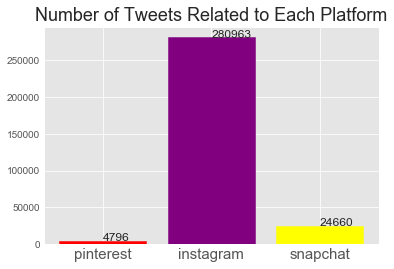

In [251]:
tweet_on_each_platform_count = [len(pinterest), len(instagram), len(snapchat)]

barlist = plt.bar([1,2,3], tweet_on_each_platform_count)
color_list = ['r', 'b', 'g']
barlist[0].set_color('red')
barlist[1].set_color('purple')
barlist[2].set_color('yellow')
plt.xticks([1,2,3],['pinterest', 'instagram', 'snapchat'], fontsize = 15)
# plt.xlabel('Platform')
plt.title('Number of Tweets Related to Each Platform', fontsize = 18)

for x, y in zip([1,2,3], tweet_on_each_platform_count):
    plt.text(x,y,str(y), fontsize = 12)
    
plt.savefig('number of tweets related to each platform.jpg');


In [253]:
pins_ratio = len(pinterest)/len(three_com2)
inst_ratio = len(instagram)/len(three_com2)
snap_ratio = len(snapchat)/len(three_com2)
pins_ratio, inst_ratio, snap_ratio

(0.015450085207413205, 0.9051089011948367, 0.07944101359775013)

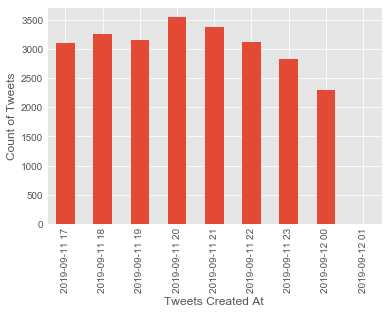

In [240]:
#total tweets over time
time_range.plot(kind = 'bar')
plt.ylabel('Count of Tweets');

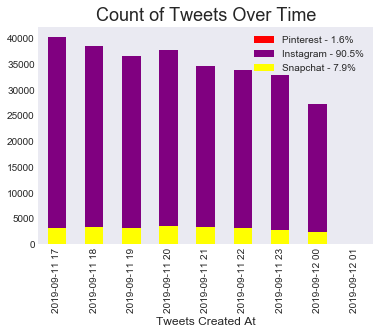

In [410]:
name_list = ['Pinterest - 1.6%', 'Instagram - 90.5%', 'Snapchat - 7.9%']
color_list = ['red', 'purple', 'yellow']
three_com2_list = [pinterest, instagram, snapchat]
# fig, axes = plt.subplots(1, 2, figsize = (8, 4))


# for idx, ax in enumerate(axes):
#     time_range = three_com2_list[idx].groupby('Tweets Created At').size()
#     ax.hist(time_range)
for i in range(3):
    time_range = three_com2_list[i].groupby('Tweets Created At').size()
    time_range.plot(kind = 'bar', color = color_list[i], label = name_list[i])

plt.title('Count of Tweets Over Time', fontsize = 18)
plt.legend()
plt.savefig('Tweets_Over_Time.jpg');


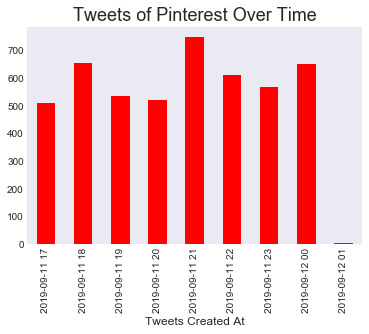

In [409]:
time_range = three_com2_list[0].groupby('Tweets Created At').size()
time_range.plot(kind = 'bar', color = color_list[0], label = name_list[0])
plt.title('Tweets of Pinterest Over Time', fontsize = 18)
plt.savefig('Pins_Tweets_Over_Time.jpg');

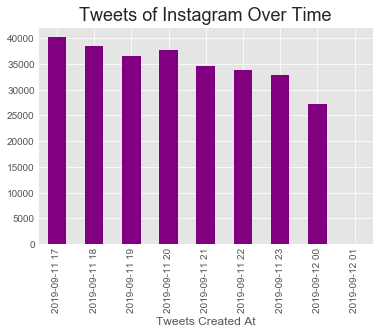

In [249]:
time_range = three_com2_list[1].groupby('Tweets Created At').size()
time_range.plot(kind = 'bar', color = 'purple', label = name_list[1])
plt.title('Tweets of Instagram Over Time', fontsize = 18)
plt.savefig('Inst_Tweets_Over_Time.jpg');

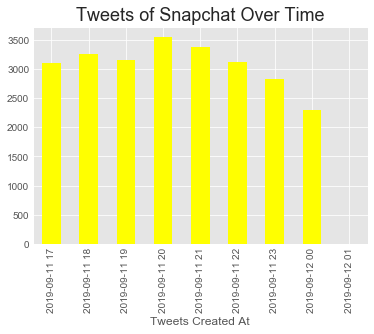

In [250]:
time_range = three_com2_list[2].groupby('Tweets Created At').size()
time_range.plot(kind = 'bar', color = 'yellow', label = name_list[2])
plt.title('Tweets of Snapchat Over Time', fontsize = 18)
plt.savefig('Snap_Tweets_Over_Time.jpg');

#### 3. Explore followers and friends count for each platform

##### (1) Pinterest

In [254]:
pinterest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4796 entries, 5221 to 10017
Data columns (total 16 columns):
id_str                  4796 non-null object
created_at              4796 non-null datetime64[ns]
text                    4796 non-null object
user_created_at         4796 non-null object
user_location           4796 non-null object
user_followers_count    4796 non-null float64
user_friends_count      4796 non-null float64
longitude               4796 non-null object
latitude                4796 non-null object
retweet_count           4796 non-null object
favorite_count          4796 non-null object
pinterest               4796 non-null float64
instagram               4796 non-null float64
snapchat                4796 non-null float64
hr                      4796 non-null object
Tweets Created At       4796 non-null object
dtypes: datetime64[ns](1), float64(5), object(10)
memory usage: 637.0+ KB


In [255]:
pinterest.describe()

,user_followers_count,user_friends_count,pinterest,instagram,snapchat
count,4.796000e+03,4796.000000,4796.0,4796.0,4796.0
mean,6.342726e+03,3400.960384,1.0,0.0,0.0
std,5.432656e+04,16971.514763,0.0,0.0,0.0
min,0.000000e+00,0.000000,1.0,0.0,0.0
25%,1.530000e+02,175.000000,1.0,0.0,0.0
50%,7.820000e+02,629.500000,1.0,0.0,0.0
75%,2.734250e+03,2332.000000,1.0,0.0,0.0
max,2.347147e+06,238236.000000,1.0,0.0,0.0


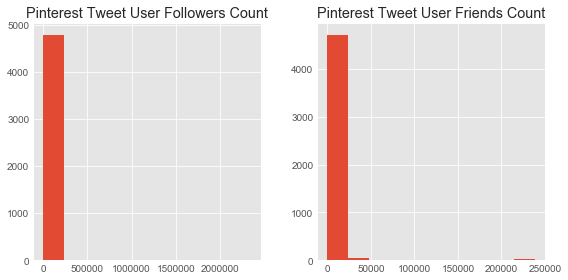

In [256]:
fig, axs = plt.subplots(1,2, figsize = (8,4))
axs[0].hist(pinterest['user_followers_count'])
axs[0].set_title('Pinterest Tweet User Followers Count')

axs[1].hist(pinterest['user_friends_count'])
axs[1].set_title('Pinterest Tweet User Friends Count')

fig.tight_layout();

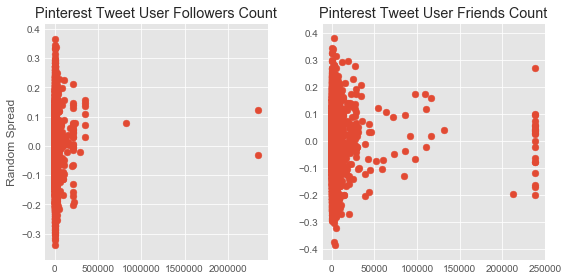

In [267]:
fig, axs = plt.subplots(1,2, figsize = (8,4))
axs[0].scatter(pinterest['user_followers_count'], np.repeat(0,len(pinterest['user_followers_count'])) 
               + np.random.normal(0, 0.1, len(pinterest['user_followers_count'])), s=45)

axs[0].set_title('Pinterest Tweet User Followers Count')
axs[0].set_ylabel('Random Spread')
axs[1].scatter(pinterest['user_friends_count'], np.repeat(0,len(pinterest['user_friends_count'])) 
               + np.random.normal(0, 0.1, len(pinterest['user_friends_count'])), s=45)
axs[1].set_title('Pinterest Tweet User Friends Count')

fig.tight_layout();

** Since the distributions of the tweets user followers count have long tail. Below I cut out the last 10% of the outliers and use the resulted data for hypothesis test

In [416]:
pins_followers = pinterest['user_followers_count'].sort_values(ascending = True)
pins_followers.max()

2347147.0

In [425]:
to_delete = int(round(0.1*len(pins_followers),0))

pins_followers.drop(pins_followers.tail(to_delete).index, inplace = True)
pins_followers.max()

7929.0

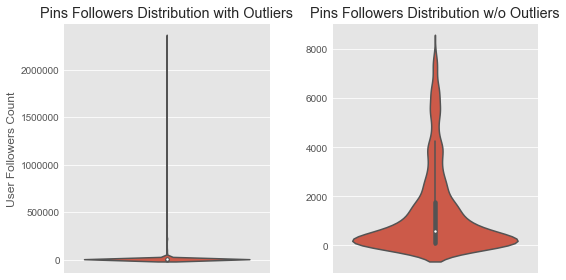

In [444]:
fig, axs = plt.subplots(1,2, figsize= (8, 4))
sns.violinplot(ax = axs[0], y = pinterest['user_followers_count'])
sns.violinplot(ax = axs[1], y = pins_followers)
axs[0].set_title('Pins Followers Distribution with Outliers')
axs[1].set_title('Pins Followers Distribution w/o Outliers')
axs[1].set_ylabel('')
axs[0].set_ylabel('User Followers Count')
fig.tight_layout()
plt.savefig('Pins Followers.jpg');

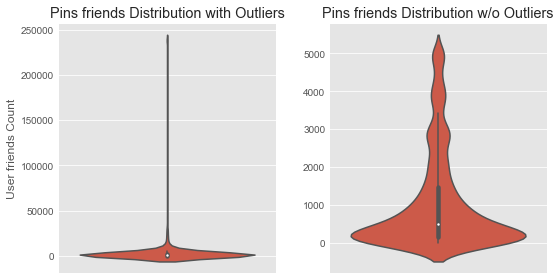

In [448]:
pins_friends = pinterest['user_friends_count'].sort_values(ascending = True)
to_delete = int(round(0.1*len(pins_friends),0))
pins_friends.drop(pins_friends.tail(to_delete).index, inplace = True)


fig, axs = plt.subplots(1,2, figsize= (8, 4))
sns.violinplot(ax = axs[0], y = pinterest['user_friends_count'])
sns.violinplot(ax = axs[1], y = pins_friends)
axs[0].set_title('Pins friends Distribution with Outliers')
axs[1].set_title('Pins friends Distribution w/o Outliers')
axs[1].set_ylabel('')
axs[0].set_ylabel('User friends Count')
fig.tight_layout()
plt.savefig('Pins Friends.jpg');

##### (2) Instagram

In [280]:
instagram.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280963 entries, 264568 to 545760
Data columns (total 16 columns):
id_str                  280963 non-null object
created_at              280963 non-null datetime64[ns]
text                    280963 non-null object
user_created_at         280963 non-null object
user_location           280963 non-null object
user_followers_count    280963 non-null float64
user_friends_count      280963 non-null float64
longitude               280963 non-null object
latitude                280963 non-null object
retweet_count           280963 non-null object
favorite_count          280963 non-null object
pinterest               280963 non-null float64
instagram               280963 non-null float64
snapchat                280963 non-null float64
hr                      280963 non-null object
Tweets Created At       280963 non-null object
dtypes: datetime64[ns](1), float64(5), object(10)
memory usage: 36.4+ MB


In [281]:
instagram.describe()

,user_followers_count,user_friends_count,pinterest,instagram,snapchat
count,2.809630e+05,2.809630e+05,280963.0,280963.0,280963.0
mean,5.638942e+03,1.157726e+03,0.0,1.0,0.0
std,1.894070e+05,1.249362e+04,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.0,1.0,0.0
25%,6.100000e+01,1.140000e+02,0.0,1.0,0.0
50%,2.560000e+02,3.190000e+02,0.0,1.0,0.0
75%,8.510000e+02,8.200000e+02,0.0,1.0,0.0
max,4.277436e+07,1.559615e+06,0.0,1.0,0.0


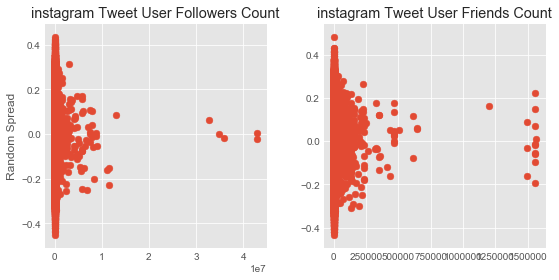

In [290]:
fig, axs = plt.subplots(1,2, figsize = (8,4))
axs[0].scatter(instagram['user_followers_count'], np.repeat(0,len(instagram['user_followers_count'])) 
               + np.random.normal(0, 0.1, len(instagram['user_followers_count'])), s=45)

axs[0].set_title('instagram Tweet User Followers Count')
axs[0].set_ylabel('Random Spread')
axs[1].scatter(instagram['user_friends_count'], np.repeat(0,len(instagram['user_friends_count'])) 
               + np.random.normal(0, 0.1, len(instagram['user_friends_count'])), s=45)
axs[1].set_title('instagram Tweet User Friends Count')

fig.tight_layout();

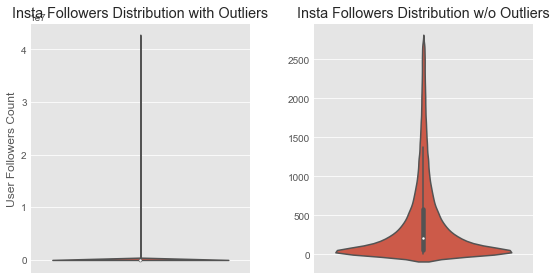

In [443]:
# To cut the long tail

insta_followers = instagram['user_followers_count'].sort_values(ascending = True)
to_delete = int(round(0.1*len(insta_followers),0))
insta_followers.drop(insta_followers.tail(to_delete).index, inplace = True)

fig, axs = plt.subplots(1,2, figsize= (8, 4))
sns.violinplot(ax = axs[0], y = instagram['user_followers_count'])
sns.violinplot(ax = axs[1], y = insta_followers)
axs[0].set_title('Insta Followers Distribution with Outliers')
axs[1].set_title('Insta Followers Distribution w/o Outliers')
axs[1].set_ylabel('')
axs[0].set_ylabel('User Followers Count')
fig.tight_layout()
plt.savefig('Insta Followers.jpg');

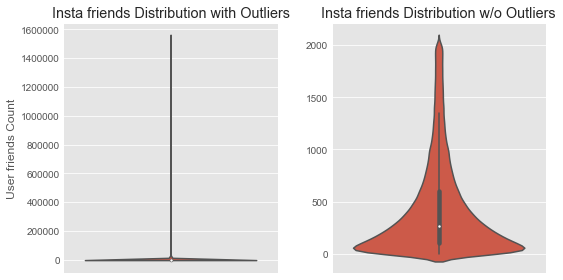

In [449]:
insta_friends = instagram['user_friends_count'].sort_values(ascending = True)
to_delete = int(round(0.1*len(insta_friends),0))
insta_friends.drop(insta_friends.tail(to_delete).index, inplace = True)


fig, axs = plt.subplots(1,2, figsize= (8, 4))
sns.violinplot(ax = axs[0], y = instagram['user_friends_count'])
sns.violinplot(ax = axs[1], y = insta_friends)
axs[0].set_title('Insta friends Distribution with Outliers')
axs[1].set_title('Insta friends Distribution w/o Outliers')
axs[1].set_ylabel('')
axs[0].set_ylabel('User friends Count')
fig.tight_layout()
plt.savefig('Insta Friends.jpg');

##### (3) Snapchat

In [282]:
snapchat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24660 entries, 571676 to 596364
Data columns (total 16 columns):
id_str                  24660 non-null object
created_at              24660 non-null datetime64[ns]
text                    24660 non-null object
user_created_at         24660 non-null object
user_location           24660 non-null object
user_followers_count    24660 non-null float64
user_friends_count      24660 non-null float64
longitude               24660 non-null object
latitude                24660 non-null object
retweet_count           24660 non-null object
favorite_count          24660 non-null object
pinterest               24660 non-null float64
instagram               24660 non-null float64
snapchat                24660 non-null float64
hr                      24660 non-null object
Tweets Created At       24660 non-null object
dtypes: datetime64[ns](1), float64(5), object(10)
memory usage: 3.2+ MB


In [283]:
snapchat.describe()

,user_followers_count,user_friends_count,pinterest,instagram,snapchat
count,2.466000e+04,2.466000e+04,24660.0,24660.0,24660.0
mean,8.249165e+03,1.005113e+03,0.0,0.0,1.0
std,8.910019e+04,1.030665e+04,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.0,0.0,1.0
25%,9.800000e+01,1.570000e+02,0.0,0.0,1.0
50%,3.570000e+02,3.610000e+02,0.0,0.0,1.0
75%,1.070000e+03,7.970000e+02,0.0,0.0,1.0
max,7.853744e+06,1.492826e+06,0.0,0.0,1.0


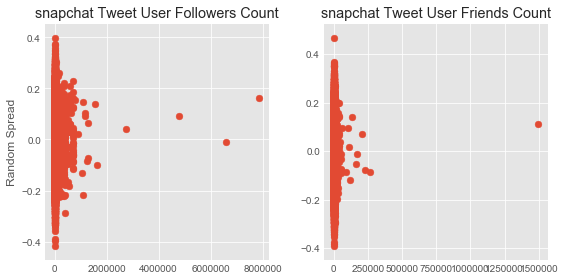

In [292]:
fig, axs = plt.subplots(1,2, figsize = (8,4))
axs[0].scatter(snapchat['user_followers_count'], np.repeat(0,len(snapchat['user_followers_count'])) 
               + np.random.normal(0, 0.1, len(snapchat['user_followers_count'])), s=45)

axs[0].set_title('snapchat Tweet User Followers Count')
axs[0].set_ylabel('Random Spread')
axs[1].scatter(snapchat['user_friends_count'], np.repeat(0,len(snapchat['user_friends_count'])) 
               + np.random.normal(0, 0.1, len(snapchat['user_friends_count'])), s=45)
axs[1].set_title('snapchat Tweet User Friends Count')

fig.tight_layout();

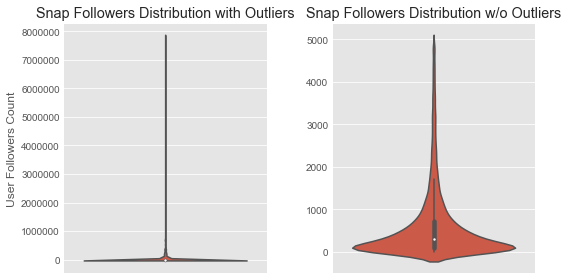

In [442]:
# To cut the long tail

snap_followers = snapchat['user_followers_count'].sort_values(ascending = True)
to_delete = int(round(0.1*len(snap_followers),0))
snap_followers.drop(snap_followers.tail(to_delete).index, inplace = True)


fig, axs = plt.subplots(1,2, figsize= (8, 4))
sns.violinplot(ax = axs[0], y = snapchat['user_followers_count'])
sns.violinplot(ax = axs[1], y = snap_followers)
axs[0].set_title('Snap Followers Distribution with Outliers')
axs[1].set_title('Snap Followers Distribution w/o Outliers')
axs[1].set_ylabel('')
axs[0].set_ylabel('User Followers Count')
fig.tight_layout()
plt.savefig('Snap Followers.jpg');

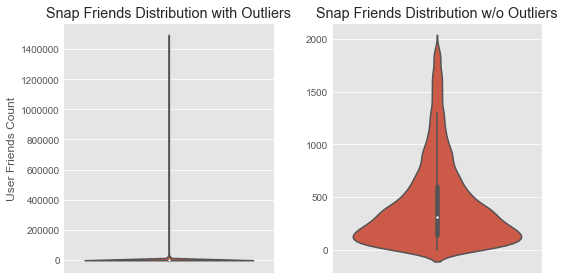

In [450]:
# To cut the long tail

snap_friends = snapchat['user_friends_count'].sort_values(ascending = True)
to_delete = int(round(0.1*len(snap_friends),0))
snap_friends.drop(snap_friends.tail(to_delete).index, inplace = True)


fig, axs = plt.subplots(1,2, figsize= (8, 4))
sns.violinplot(ax = axs[0], y = snapchat['user_friends_count'])
sns.violinplot(ax = axs[1], y = snap_friends)
axs[0].set_title('Snap Friends Distribution with Outliers')
axs[1].set_title('Snap Friends Distribution w/o Outliers')
axs[1].set_ylabel('')
axs[0].set_ylabel('User Friends Count')
fig.tight_layout()
plt.savefig('Snap Friends.jpg');

##### (4). Hypothesis Test

** Identify the distribution of user followers count and friends count. 


##### (a) Followers - Test with outliers 

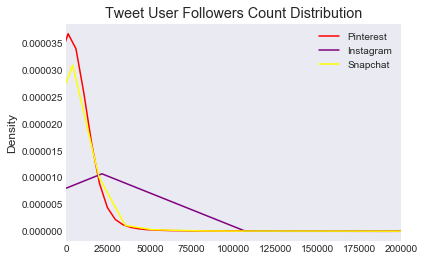

In [393]:
#The distribution of user followers count
ax= pinterest['user_followers_count'].plot.kde(color = 'red', label ='Pinterest')
ax= instagram['user_followers_count'].plot.kde(color = 'purple', label ='Instagram')
ax= snapchat['user_followers_count'].plot.kde(color = 'yellow', label ='Snapchat')
ax.set_xlim(0, 200000)
ax.legend()
ax.set_title('Tweet User Followers Count Distribution')
plt.savefig('Follower Distribution.jpg');

** Mann- Whitney U-test: since it's not clear what distribution the followers count follows per the plot. With u-test, we can perform hypothesis testing without assuming any distribution for the population

In [347]:
pinterest_user_followers = pinterest['user_followers_count']
instagram_user_followers = instagram['user_followers_count']
snapchat_user_followers = snapchat['user_followers_count']

In [350]:
pinterest_user_followers.mean(), np.sqrt(pinterest_user_friends.var()), pinterest_user_followers.max()

(6342.725604670559, 16750.7771248238, 2347147.0)

In [351]:
instagram_user_followers.mean(), np.sqrt(instagram_user_friends.var()), instagram_user_followers.max()

(5638.941835757733, 9930.925478134684, 42774359.0)

In [352]:
snapchat_user_followers.mean(), np.sqrt(snapchat_user_friends.var()), snapchat_user_followers.max()

(8249.165125709651, 8344.560914996777, 7853744.0)

In [359]:
"""

Pints_Followers: The mean of followers count for users who posted tweets mentioning pinterest
Insta_Followers: The mean of followers count for users who posted tweets mentioning instagram
Snap_Followers: The mean of followers count for users who posted tweets mentioning snapchat

Null_1 Hypothesis: Pints_Followers = Insta_Followers
Alternate_1 Hypothesis: Pints_Followers > Insta_Followers

Null_2 Hypothesis: Pints_Followers = Snap_Followers
Alternate_2 Hypothesis: Pints_Followers < Snap_Followers

Null_3 Hypothesis: Insta_Followers = Snap_Followers
Alternate_3 Hypothesis: Insta_Followers < Snap_Followers

Alpha = 0.05/3

"""

pins_greater_insta = stats.mannwhitneyu(pinterest_user_followers, instagram_user_followers, alternative="greater")
print("p-value for pinterest_user_followers > instagram_user_followers: {:2.10f}".format(pins_greater_insta.pvalue))

pins_less_snap = stats.mannwhitneyu(pinterest_user_followers, snapchat_user_followers, alternative="less")
print("p-value for pinterest_user_followers < snapchat_user_followers: {:2.10f}".format(pins_less_snap.pvalue))

insta_less_snap = stats.mannwhitneyu(instagram_user_followers, snapchat_user_followers, alternative="less")
print("p-value for instagram_user_followers < snapchat_user_followers: {:2.10f}".format(insta_less_snap.pvalue))

p-value for pinterest_user_followers > instagram_user_followers: 0.0000000000
p-value for pinterest_user_followers < snapchat_user_followers: 1.0000000000
p-value for instagram_user_followers < snapchat_user_followers: 0.0000000000


##### (b) Followers - Test w/o outliers 

In [445]:
pins_followers.mean(), insta_followers.mean(), snap_followers.mean()

(1344.3952734012976, 429.54026029493764, 606.0185635757412)

Text(0.5, 1.0, 'Tweet User Followers Count Distribution')

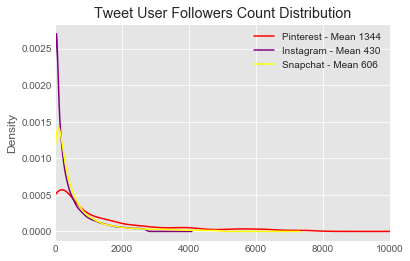

In [455]:
#The distribution of user followers count without long tail
ax= pins_followers.plot.kde(color = 'red', label ='Pinterest - Mean 1344')
ax= insta_followers.plot.kde(color = 'purple', label ='Instagram - Mean 430')
ax= snap_followers.plot.kde(color = 'yellow', label ='Snapchat - Mean 606')
ax.set_xlim(0, 10000)
ax.legend()
ax.set_title('Tweet User Followers Count Distribution')

In [446]:
pins_greater_insta = stats.mannwhitneyu(pins_followers, insta_followers, alternative="greater")
print("p-value for pinterest_user_followers > instagram_user_followers: {:2.10f}".format(pins_greater_insta.pvalue))

pins_less_snap = stats.mannwhitneyu(pins_followers, snap_followers, alternative="greater")
print("p-value for pinterest_user_followers > snapchat_user_followers: {:2.10f}".format(pins_less_snap.pvalue))

insta_less_snap = stats.mannwhitneyu(insta_followers, snap_followers, alternative="less")
print("p-value for instagram_user_followers < snapchat_user_followers: {:2.10f}".format(insta_less_snap.pvalue))

p-value for pinterest_user_followers > instagram_user_followers: 0.0000000000
p-value for pinterest_user_followers > snapchat_user_followers: 0.0000000000
p-value for instagram_user_followers < snapchat_user_followers: 0.0000000000


*From the u-test above, we reject Null_1 and Null_3 in favor of corresponding alternate hypothesis, but we fail to reject Null_2

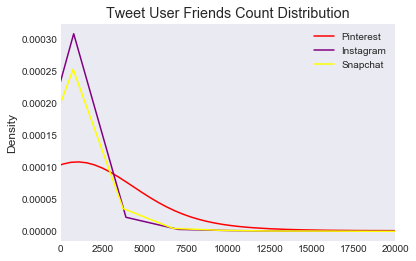

In [346]:
# The distribution of user friends count
ax= pinterest['user_friends_count'].plot.kde(color = 'red', label ='Pinterest')
ax= instagram['user_friends_count'].plot.kde(color = 'purple', label ='Instagram')
ax= snapchat['user_friends_count'].plot.kde(color = 'yellow', label ='Snapchat')
ax.set_xlim(0, 20000)
ax.legend()
ax.set_title('Tweet User Friends Count Distribution')
plt.savefig('Friends Count Distribution.jpg');

In [353]:
pinterest_user_friends = pinterest['user_friends_count']
instagram_user_friends = instagram['user_friends_count']
snapchat_user_friends = snapchat['user_friends_count']

In [366]:
pinterest_user_friends.mean(), instagram_user_friends.mean(), snapchat_user_friends.mean()

(3400.960383653044, 1157.7258500229568, 1005.112895377129)

In [368]:

"""
Null hypothesis: users of tweets mentioning Pinterest have same amount of friends as users 
of tweets mentioning instagram.

Null_1 Hypothesis: Pints_Friends = Insta_Friends
Alternate_1 Hypothesis: Pints_Friends > Insta_Friends

Null_2 Hypothesis: Pints_Friends = Snap_Friends
Alternate_2 Hypothesis: Pints_Friends > Snap_Friends

Null_3 Hypothesis: Insta_Friends = Snap_Friends
Alternate_3 Hypothesis: Insta_Friends > Snap_Friends

Alpha = 0.05/3

"""

pins_greater_insta = stats.mannwhitneyu(pinterest_user_friends, instagram_user_friends, alternative="greater")
print("p-value for pinterest_user_friends > instagram_user_friends: {:2.3f}".format(pins_greater_insta.pvalue))

pins_greater_snap = stats.mannwhitneyu(pinterest_user_friends, snapchat_user_friends, alternative="greater")
print("p-value for pinterest_user_friends > snapchat_user_friends: {:2.3f}".format(pins_greater_snap.pvalue))

insta_greater_snap = stats.mannwhitneyu(instagram_user_friends, snapchat_user_friends, alternative="greater")
print("p-value for instagram_user_friends > snapchat_user_friends: {:2.3f}".format(insta_greater_snap.pvalue))

p-value for pinterest_user_friends > instagram_user_friends: 0.000
p-value for pinterest_user_friends > snapchat_user_friends: 0.000
p-value for instagram_user_friends > snapchat_user_friends: 1.000


Text(0.5, 1.0, 'Tweet User Friends Count Distribution')

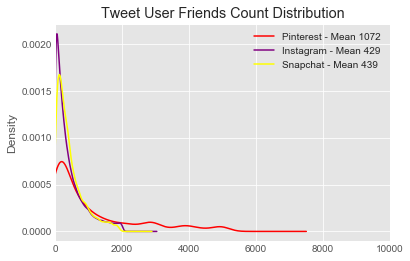

In [456]:
#The distribution of user followers count without long tail
ax= pins_friends.plot.kde(color = 'red', label ='Pinterest - Mean 1072')
ax= insta_friends.plot.kde(color = 'purple', label ='Instagram - Mean 429')
ax= snap_friends.plot.kde(color = 'yellow', label ='Snapchat - Mean 439')
ax.set_xlim(0, 10000)
ax.legend()
ax.set_title('Tweet User Friends Count Distribution')

In [452]:
pins_friends.mean(), insta_friends.mean(), snap_friends.mean()

(1072.0982391102873, 429.0046585754567, 438.94376858610434)

In [457]:
pins_greater_insta = stats.mannwhitneyu(pins_friends, insta_friends, alternative="greater")
print("p-value for pinterest_user_friends > instagram_user_friends: {:2.3f}".format(pins_greater_insta.pvalue))

pins_greater_snap = stats.mannwhitneyu(pins_friends, snap_friends, alternative="greater")
print("p-value for pinterest_user_friends > snapchat_user_friends: {:2.3f}".format(pins_greater_snap.pvalue))

snap_greater_insta = stats.mannwhitneyu(snap_friends, insta_friends, alternative="greater")
print("p-value for snapchat_user_friends > instagram_user_friends: {:2.3f}".format(insta_greater_snap.pvalue))

p-value for pinterest_user_friends > instagram_user_friends: 0.000
p-value for pinterest_user_friends > snapchat_user_friends: 0.000
p-value for snapchat_user_friends > instagram_user_friends: 1.000


*From the u-test above, we reject Null_1 and Null_2 in favor of corresponding alternate hypothesis, but we fail to reject Null_3

#### 4. Explore the users' location

In [369]:
three_com3 = three_com2[(three_com2['longitude'] != 'None') & (three_com2['latitude'] != 'None')]

In [370]:
three_com3['longitude'] = pd.to_numeric(three_com3['longitude'])
three_com3['latitude'] = pd.to_numeric(three_com3['latitude'])

/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [372]:
len(three_com3)/len(three_com2)

0.0826592444405787

** There is only 8% of the tweets showing the users' location

In [373]:
import geopandas

# http://geopandas.org/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py

from shapely.geometry import Polygon

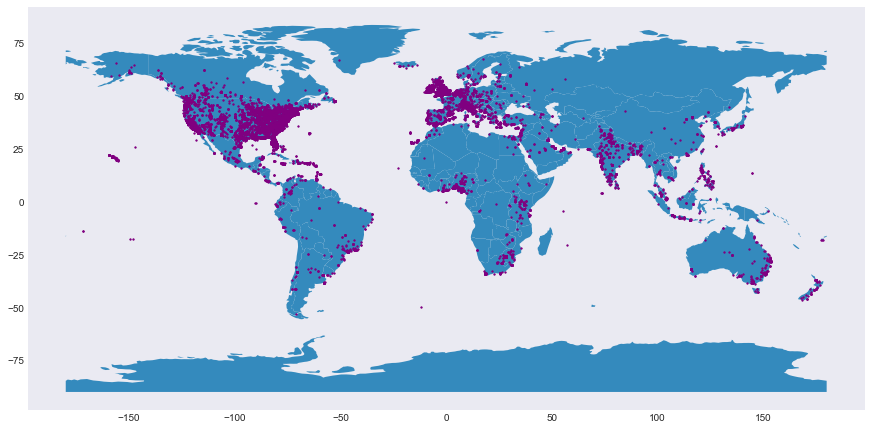

In [374]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(three_com3['longitude'], three_com3['latitude'])]
gdf = GeoDataFrame(three_com3, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 12)), marker='o', color='purple', markersize=3);

##### User location for each subset -> the amount of data points is too small to make a informative plot

In [375]:
pinterest3 = three_com3[three_com3['pinterest'] == 1]
instagram3 = three_com3[three_com3['instagram'] == 1]
snapchat3 = three_com3[three_com3['snapchat'] == 1]

In [376]:
len(pinterest3), len(instagram3), len(snapchat3)

(3, 25648, 8)

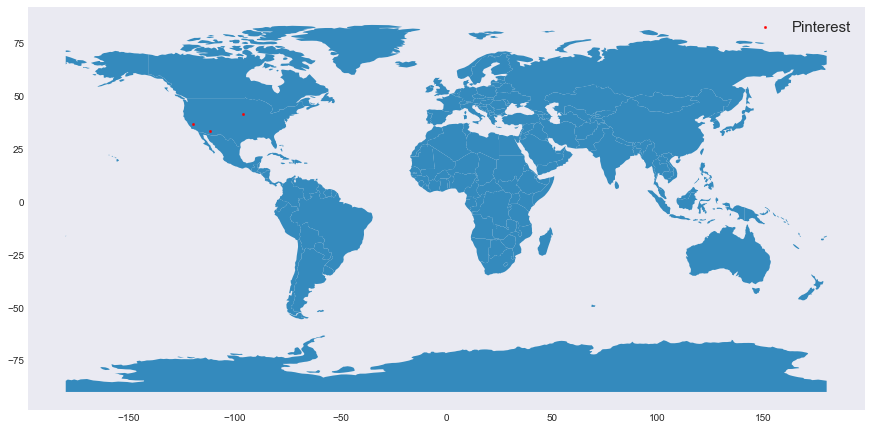

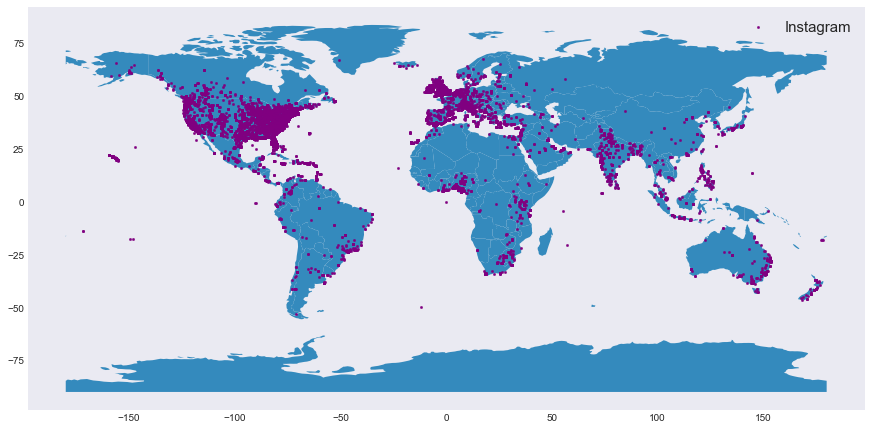

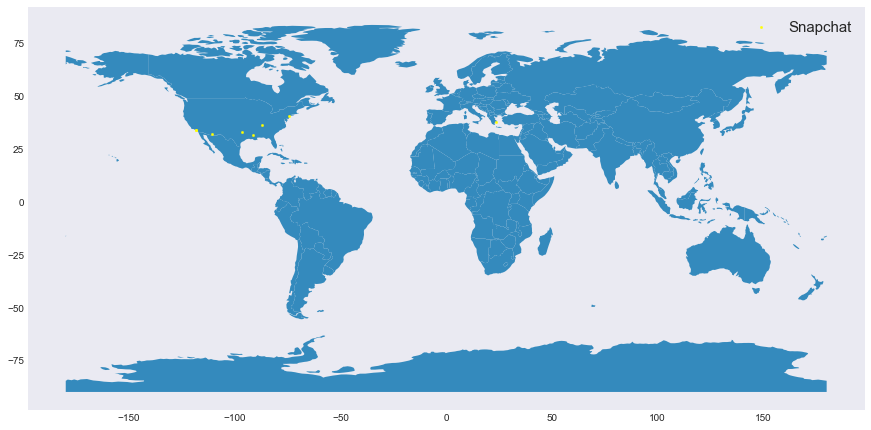

In [380]:
name_list = ['Pinterest', 'Instagram', 'Snapchat']
color_list = ['red', 'purple', 'yellow']
df_list = [pinterest3,instagram3,snapchat3]
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
for i in range(3):
    geometry = [Point(xy) for xy in zip(df_list[i]['longitude'], df_list[i]['latitude'])]
    gdf = GeoDataFrame(df_list[i], geometry=geometry)
    gdf.plot(ax=world.plot(figsize=(15, 12)), marker='o', color=color_list[i], markersize=5, legend = True, label = name_list[i])
    plt.legend(fontsize = 15)
    plt.savefig('%s user location.jpg' % name_list[i])
    

In [381]:
# geometry_pinterest = [Point(xy) for xy in zip(pinterest3['longitude'], pinterest3['latitude'])]
# geometry_instagram = [Point(xy) for xy in zip(instagram3['longitude'], instagram3['latitude'])]
# geometry_snapchat = [Point(xy) for xy in zip(snapchat3['longitude'], snapchat3['latitude'])]

# gdf_pinterest = GeoDataFrame(pinterest3, geometry=geometry_pinterest)   
# gdf_instagram = GeoDataFrame(instagram3, geometry=geometry_instagram)
# gdf_snapchat = GeoDataFrame(snapchat3, geometry=geometry_snapchat)


# #this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf_pinterest.plot(ax=world.plot(figsize=(15, 12)), marker='o', color='red', markersize=3, legend = True, label = 'Pinterest')
# gdf_instagram.plot(ax=world.plot(figsize=(15, 12)), marker='o', color='purple', markersize=3, legend = True, label = 'Instagram')
# gdf_snapchat.plot(ax=world.plot(figsize=(15, 12)), marker='o', color='yellow', markersize=3, legend = True, label = 'Snapchat')
# plt.legend();

In [385]:
# how to process location data
import collections
location_counts = collections.Counter(three_com['user_location'])
location_counts.most_common()

[('None', 169253),
 ('United States', 6998),
 ('Los Angeles, CA', 5528),
 ('London, England', 3360),
 ('California, USA', 3137),
 ('Lagos, Nigeria', 2831),
 ('New York, NY', 2740),
 ('Atlanta, GA', 2558),
 ('Houston, TX', 2488),
 ('Chicago, IL', 2277),
 ('Florida, USA', 2135),
 ('Texas, USA', 1949),
 ('United Kingdom', 1919),
 ('London', 1825),
 ('Nigeria', 1630),
 ('Canada', 1597),
 ('England, United Kingdom', 1587),
 ('USA', 1541),
 ('Dallas, TX', 1472),
 ('New York, USA', 1455),
 ('Miami, FL', 1393),
 ('Brooklyn, NY', 1370),
 ('Toronto, Ontario', 1357),
 ('Los Angeles', 1353),
 ('Las Vegas, NV', 1277),
 ('Washington, DC', 1206),
 ('Philadelphia, PA', 1206),
 ('San Diego, CA', 1079),
 ('New York', 1064),
 ('New Jersey, USA', 1054),
 ('Worldwide', 1038),
 ('Austin, TX', 1009),
 ('Georgia, USA', 977),
 ('India', 935),
 ('Seattle, WA', 909),
 ('San Francisco, CA', 888),
 ('Boston, MA', 856),
 ('NYC', 852),
 ('UK', 848),
 ('Nashville, TN', 838),
 ('North Carolina, USA', 834),
 ('Pennsylv

#### 5. Sentiment analysis

In [386]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment(sentence):    
    sentiment = SentimentIntensityAnalyzer()
    score = sentiment.polarity_scores(sentence)
    return score  

In [387]:
def sentiment_analysis(text_series):
    sentiment_analysis_result = []
    
    #Perform sentiment analysis for each tweet and save the analysis result to a dataframe
    for tweet in text_series:
        sentiment_analysis_result.append([tweet, sentiment(tweet)['neg'], sentiment(tweet)['neu'], 
                                      sentiment(tweet)['pos'], sentiment(tweet)['compound']]) 
    
    col_names = ['text', 'negative', ' neutral', 'positive', 'compound']
    return pd.DataFrame(sentiment_analysis_result, columns = col_names)
    

In [388]:
#How many RT for each platform
a = len(pinterest[pinterest['text'].str.startswith('RT')])
b = len(instagram[instagram['text'].str.startswith('RT')])
c = len(snapchat[snapchat['text'].str.startswith('RT')])
a, b, c

(1671, 125915, 17096)

In [389]:
#Filter all original tweets for sentiment analysis

pinterest2 = pinterest[~pinterest['text'].str.startswith('RT')]
instagram2 = instagram[~instagram['text'].str.startswith('RT')]
snapchat2 = snapchat[~snapchat['text'].str.startswith('RT')]

In [390]:
#How many original tweets for pins
a_org = len(pinterest[~pinterest['text'].str.startswith('RT')])
b_org = len(instagram[~instagram['text'].str.startswith('RT')])
c_org  = len(snapchat[~snapchat['text'].str.startswith('RT')])
a_org, b_org, c_org

(3125, 155048, 7564)

In [391]:
pinterest_sentiment_analysis = sentiment_analysis(pinterest2['text'])
pinterest_sentiment_analysis.head()

,text,negative,neutral,positive,compound
0,Check our our #Pinterest board for loads of gr...,0.000,0.761,0.239,0.6588
1,i want a pinterest life,0.000,0.606,0.394,0.0772
2,Impressed but not surprised that is famous on ...,0.309,0.573,0.117,-0.5186
3,Add Pepha Tight (seaweed or algae) to any prod...,0.000,1.000,0.000,0.0000
4,This easy roll recipe needs just a few ingredi...,0.000,0.694,0.306,0.7650


In [394]:
pinterest_sentiment_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 5 columns):
text        3125 non-null object
negative    3125 non-null float64
 neutral    3125 non-null float64
positive    3125 non-null float64
compound    3125 non-null float64
dtypes: float64(4), object(1)
memory usage: 122.1+ KB


In [398]:
pinterest_sentiment_analysis.to_csv('pins_sentiment_analysis.txt')

In [392]:
instagram_sentiment_analysis = sentiment_analysis(instagram2['text'])
instagram_sentiment_analysis.head()

,text,negative,neutral,positive,compound
0,Just posted a photo,0.000,1.000,0.000,0.0000
1,Did you know that Barra airport is the only ai...,0.000,1.000,0.000,0.0000
2,Emotional Intelligence suddenly seems to be th...,0.000,0.793,0.207,0.5719
3,like all social media sucks but there's basica...,0.195,0.730,0.075,-0.4215
4,A look at 's most adorable Insta posts on her ...,0.000,0.725,0.275,0.5838


In [395]:
instagram_sentiment_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155048 entries, 0 to 155047
Data columns (total 5 columns):
text        155048 non-null object
negative    155048 non-null float64
 neutral    155048 non-null float64
positive    155048 non-null float64
compound    155048 non-null float64
dtypes: float64(4), object(1)
memory usage: 5.9+ MB


In [399]:
instagram_sentiment_analysis.to_csv('insta_sentiment_analysis.txt')

In [407]:
snapchat_sentiment_analysis = sentiment_analysis(snapchat2['text'])
print(snapchat_sentiment_analysis.head(1))

                                                text  negative   neutral  \
0  $VERB _Co #MicroSite #ContentMarketing #BuiltI...       0.0       1.0   

   positive  compound  
0       0.0       0.0  


In [397]:
snapchat_sentiment_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7564 entries, 0 to 7563
Data columns (total 5 columns):
text        7564 non-null object
negative    7564 non-null float64
 neutral    7564 non-null float64
positive    7564 non-null float64
compound    7564 non-null float64
dtypes: float64(4), object(1)
memory usage: 295.5+ KB


In [400]:
snapchat_sentiment_analysis.to_csv('snap_sentiment_analysis.txt')

##### a. analysis on compound

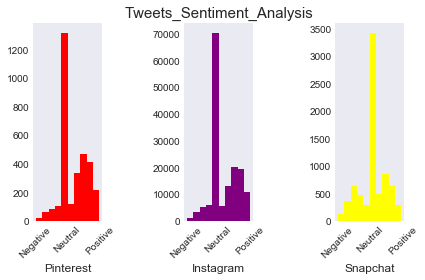

In [406]:
#Plot the distribution of the compound value for each platform (only focus on 
#comparison of positive value and ratio. To delete)

fig, axes = plt.subplots(1, 3, figsize =(6,4))
color_list = ['red', 'purple', 'yellow']
sentiment_result = [pinterest_sentiment_analysis, instagram_sentiment_analysis, snapchat_sentiment_analysis ]
platform = ['Pinterest', 'Instagram', 'Snapchat']
xtick = ['Negative', 'Neutral', 'Positive']
for idx, ax in enumerate(axes):
    ax.hist(sentiment_result[idx]['compound'], color = color_list[idx])
    ax.set_xlabel(platform[idx])
    ax.set_xticks([-1, 0, 1])
    ax.set_xticklabels(["Negative", 'Neutral', "Positive"], rotation = 45)

axes[1].set_title('Tweets_Sentiment_Analysis', fontsize =15)
plt.tight_layout()

##### b. analysis on positive values

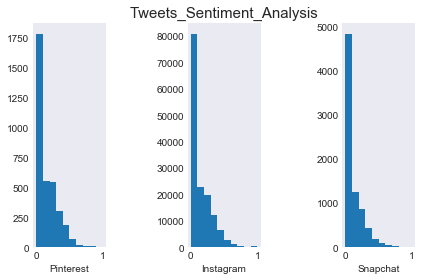

In [439]:
fig, axes = plt.subplots(1, 3, figsize =(6,4))

sentiment_result = [pinterest_sentiment_analysis, instagram_sentiment_analysis, snapchat_sentiment_analysis ]
platform = ['Pinterest', 'Instagram', 'Snapchat']
xtick = ['Negative', 'Neutral', 'Positive']
for idx, ax in enumerate(axes):
    ax.hist(sentiment_result[idx]['positive'])
    ax.set_xlabel(platform[idx])


axes[1].set_title('Tweets_Sentiment_Analysis', fontsize =15)
plt.tight_layout()


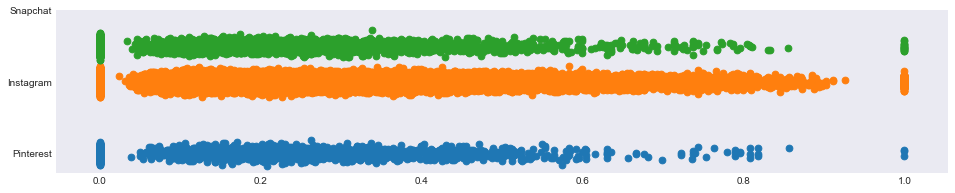

In [441]:
sentiment_positive = [pinterest_sentiment_analysis['positive'], instagram_sentiment_analysis['positive'], 
                      snapchat_sentiment_analysis['positive']]
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(sentiment_compound[0], np.repeat(0, len(sentiment_compound[0])) + np.random.normal(0, 0.1, len(sentiment_compound[0])), s=45)
ax.scatter(sentiment_compound[1], np.repeat(1, len(sentiment_compound[1])) + np.random.normal(1, 0.1, len(sentiment_compound[1])), s=45)
ax.scatter(sentiment_compound[2], np.repeat(1, len(sentiment_compound[2])) + np.random.normal(2, 0.1, len(sentiment_compound[2])), s=45)
ax.set_yticks([0, 2, 4])
ax.set_yticklabels(["Pinterest", "Instagram", "Snapchat"]);

#### u-test for text positivity difference

In [435]:
pinterest_positive = pinterest_sentiment_analysis['positive']
instagram_positive = instagram_sentiment_analysis['positive']
snapchat_positive = snapchat_sentiment_analysis['positive']

In [ ]:
insta_equal_snap = stats.mannwhitneyu(instagram_positive, snapchat_positive, alternative="two-sided")
print("p-value for instagram_positive = snapchat_positive: {:2.30f}".format(insta_equal_snap.pvalue))

insta_greater_snap = stats.mannwhitneyu(instagram_positive, snapchat_positive, alternative="greater")
print("p-value for instagram_positive > snapchat_positive: {:2.30f}".format(insta_greater_snap.pvalue))

insta_less_snap = stats.mannwhitneyu(instagram_positive, snapchat_positive, alternative="less")
print("p-value for instagram_positive < snapchat_positive: {:2.30f}".format(insta_less_snap.pvalue))

In [443]:
pins_equal_snap = stats.mannwhitneyu(pinterest_positive, snapchat_positive, alternative="two-sided")
print("p-value for pinterest_positive = snapchat_positive: {:2.3f}".format(pins_equal_snap.pvalue))

pins_greater_snap = stats.mannwhitneyu(pinterest_positive, snapchat_positive, alternative="greater")
print("p-value for pinterest_positive > snapchat_positive: {:2.3f}".format(pins_greater_snap.pvalue))

pins_less_snap = stats.mannwhitneyu(pinterest_positive, snapchat_positive, alternative="less")
print("p-value for pinterest_positive < snapchat_positive: {:2.3f}".format(pins_less_snap.pvalue))

p-value for pinterest_positive = snapchat_positive: 0.000
p-value for pinterest_positive > snapchat_positive: 0.000
p-value for pinterest_positive < snapchat_positive: 1.000


In [445]:
pins_equal_insta = stats.mannwhitneyu(pinterest_positive, instagram_positive, alternative="two-sided")
print("p-value for pinterest_positive = instagram_positive: {:2.3f}".format(pins_equal_insta.pvalue))

pins_greater_insta = stats.mannwhitneyu(pinterest_positive, instagram_positive, alternative="greater")
print("p-value for pinterest_positive > instagram_positive: {:2.3f}".format(pins_greater_insta.pvalue))

pins_less_insta = stats.mannwhitneyu(pinterest_positive, instagram_positive, alternative="less")
print("p-value for pinterest_positive < instagram_positive: {:2.3f}".format(pins_less_insta.pvalue))

p-value for pinterest_positive = instagram_positive: 0.000
p-value for pinterest_positive > instagram_positive: 0.000
p-value for pinterest_positive < instagram_positive: 1.000


##### c. See further analysis in notebook "Tweets Sentiment Analysis.ipynb"

#### d. Wit
https://github.com/wit-ai/pywit

Being feeding a sentence, wit will start detecting sentiment (positive, neutral or negative) in the sentence. The confidence value corresponds to how confident wit are in detecting such sentiment. It's only available in English (May 2018). The sentiment analysis result received from Wit.ai is saved in **"three_com_from_fb.txt"**

In [401]:
#use clean combined data for the facebook sentiment analysis

three_com_for_fb = three_com2[~three_com2['text'].str.startswith('RT')]
len(three_com_for_fb)

165737

In [402]:
three_com_for_fb[['id_str', 'text']].to_csv('three_com_for_fb.txt', index = None, header = None)